# The CIFAR-10 dataset
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

In [0]:
%tensorflow_version 1.x
from keras.datasets import cifar10
from keras.utils import np_utils

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.

In [84]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [85]:
from keras.models import Model, Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Dense, Dropout, Activation, \
Flatten, Conv3D, MaxPooling3D
from keras import regularizers
from keras.optimizers import RMSprop, Adam
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Learning params:

num_classes = 6
learning_rate = 0.0001
batch_size = 32    
num_epochs = 50

# Extraction of the train data with num_classes != 10:

x_train_bis, y_train_bis = [], []
x_test_bis, y_test_bis = [], []
x_other, y_other = [], []

if num_classes != 10:
  for i in range(x_train.shape[0]):
    if y_train[i,0] < num_classes:
      x_train_bis.append(x_train[i])
      y_train_bis.append(y_train[i])
    else:
      x_other.append(x_train[i])
      y_other.append(y_train[i])
  for i in range(x_test.shape[0]):
    if y_test[i,0] < num_classes:
      x_test_bis.append(x_test[i])
      y_test_bis.append(y_test[i])
    else:
      x_other.append(x_test[i])
      y_other.append(y_test[i])

x_train_bis = np.array(x_train_bis, dtype = np.float32)
y_train_bis = np.array(y_train_bis, dtype = int)
x_test_bis = np.array(x_test_bis, dtype = np.float32)
y_test_bis = np.array(y_test_bis, dtype = int)
x_other = np.array(x_other, dtype = np.float32)
y_other = np.array(y_other, dtype = int)

print("Train set:", x_train_bis.shape[0], "images")
print("Test set:", x_test_bis.shape[0], "images")
print("X Other classes:", x_other.shape[0])

y_train_bis = np_utils.to_categorical(y_train_bis, num_classes) # One-hot encode the labels
y_test_bis = np_utils.to_categorical(y_test_bis, num_classes)
y_train_bis = y_train_bis.astype('int')
y_test_bis = y_test_bis.astype('int')

# # --------------------------------------
# # CNN network definition 1
# # --------------------------------------

# # Network params
  
# conv_depth_1 = 32
# kernel_size_1 = 7
# pool_size_1 = 2 

# conv_depth_2 = 32 
# kernel_size_2 = 5
# pool_size_2 = 2

# conv_depth_3 = 64
# kernel_size_3 = 5
# pool_size_3 = 2

# conv_depth_4 = 128
# kernel_size_4 = 3
# pool_size_4 = 2

# drop_prob_1 = 0.3  
# drop_prob_2 = 0.3   
# hidden_size = 256  
# weight_penalty = 0.0001 

# # Model

# model = Sequential()

# model.add( Conv2D(conv_depth_1, (kernel_size_1,kernel_size_1),
#                   kernel_regularizer=regularizers.l2(weight_penalty),
#                   activation='relu', data_format="channels_first", 
#                   padding='same', input_shape=x_train.shape[1:]))
# model.add( MaxPooling2D(pool_size=(pool_size_1, pool_size_1)) )
# model.add( Dropout(drop_prob_1) )

# model.add( Conv2D(conv_depth_2, (kernel_size_2,kernel_size_2), padding='same', 
#                   activation='relu', 
#                   kernel_regularizer=regularizers.l2(weight_penalty)))
# model.add( MaxPooling2D(pool_size=(pool_size_2, pool_size_2)) )
# model.add( Dropout(drop_prob_1) )

# model.add( Conv2D(conv_depth_3, (kernel_size_3,kernel_size_3), padding='same', 
#                   activation='relu', 
#                   kernel_regularizer=regularizers.l2(weight_penalty)) )
# model.add( MaxPooling2D(pool_size=(pool_size_3, pool_size_3)) )
# model.add( Dropout(drop_prob_1) )

# model.add( Conv2D(conv_depth_4, (kernel_size_4,kernel_size_4), padding='same', 
#                   activation='relu', 
#                   kernel_regularizer=regularizers.l2(weight_penalty)) )
# model.add( MaxPooling2D(pool_size=(pool_size_4, pool_size_4)) )
# model.add( Dropout(drop_prob_1) )

# # Now flatten to 1D, apply FC -> ReLU (with dropout) -> softmax
# model.add( Flatten() )
# model.add( Dense(hidden_size, activation='relu', 
#                  kernel_regularizer=regularizers.l2(weight_penalty)) )
# model.add( Dropout(drop_prob_2) )
# model.add( Dense(num_classes, activation='softmax') )

# print(model.summary())

# --------------------------------------
# CNN network definition 2
# --------------------------------------

# # Network params
  
# conv_depth_1 = 32
# kernel_size_1 = 5
# pool_size_1 = 2 

# conv_depth_2 = 64 
# kernel_size_2 = 3
# pool_size_2 = 2

# drop_prob_1 = 0.4  
# drop_prob_2 = 0.4

# hidden_size_1 = 3136
# hidden_size_2 = 1024
# hidden_size_3 = 512 

# weight_penalty = 0.0001 

# # Model

# model = Sequential()

# model.add( Conv2D(conv_depth_1, (kernel_size_1,kernel_size_1),
#                   kernel_regularizer=regularizers.l2(weight_penalty),
#                   activation='relu', data_format="channels_first", 
#                   padding='same', input_shape=x_train.shape[1:]))
# model.add( MaxPooling2D(pool_size=(pool_size_1, pool_size_1)) )
# model.add( Dropout(drop_prob_1) )

# model.add( Conv2D(conv_depth_2, (kernel_size_2,kernel_size_2), padding='same', 
#                   activation='relu', 
#                   kernel_regularizer=regularizers.l2(weight_penalty)))
# model.add( MaxPooling2D(pool_size=(pool_size_2, pool_size_2)) )
# model.add( Dropout(drop_prob_1) )

# # Now flatten to 1D, apply FC -> ReLU (with dropout) -> softmax

# model.add( Flatten() )
# model.add( Dense(hidden_size_1, activation='relu', 
#                 kernel_regularizer=regularizers.l2(weight_penalty)) )
# model.add( Dropout(drop_prob_2))

# model.add( Dense(hidden_size_2, activation='relu', 
#                 kernel_regularizer=regularizers.l2(weight_penalty)) )
# model.add( Dropout(drop_prob_2))

# model.add( Dense(hidden_size_3, activation='relu', 
#                 kernel_regularizer=regularizers.l2(weight_penalty)) )
# model.add( Dropout(drop_prob_2))

# model.add( Dense(num_classes, activation='softmax') )

# print(model.summary())


# --------------------------------------
# CNN network definition 3
# --------------------------------------

# Network params
  
conv_depth_1 = 100
kernel_size_1 = 3

conv_depth_2 = 100 
kernel_size_2 = 3
pool_size_2 = 2

conv_depth_3 = 200 
kernel_size_3 = 3

conv_depth_4 = 200 
kernel_size_4 = 3

conv_depth_5 = 400 
kernel_size_5 = 3
pool_size_5 = 2

hidden_size_1 = 600

weight_penalty = 0.0001 


model = Sequential()

model.add(Conv2D(conv_depth_1, (kernel_size_1, kernel_size_1), padding='same',
                 input_shape=x_train_bis.shape[1:]))
model.add(Activation('relu'))

model.add(Conv2D(conv_depth_2, (kernel_size_2, kernel_size_2), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size_2, pool_size_2)))
model.add(Dropout(0.3))

model.add(Conv2D(conv_depth_3, (kernel_size_3, kernel_size_3), padding='same', 
                 kernel_regularizer=regularizers.l2(weight_penalty)))
model.add(Activation('relu'))

model.add(Conv2D(conv_depth_4, (kernel_size_4, kernel_size_4), padding='same',
                 kernel_regularizer=regularizers.l2(weight_penalty)))
model.add(Activation('relu'))

model.add(Conv2D(conv_depth_5, (kernel_size_5, kernel_size_5), padding='same', 
                 kernel_regularizer=regularizers.l2(weight_penalty)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size_5, pool_size_5)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(hidden_size_1, 
                kernel_regularizer=regularizers.l2(weight_penalty)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

print(model.summary())

Train set: 30000 images
Test set: 6000 images
X Other classes: 24000
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 32, 32, 100)       2800      
_________________________________________________________________
activation_71 (Activation)   (None, 32, 32, 100)       0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 32, 32, 100)       90100     
_________________________________________________________________
activation_72 (Activation)   (None, 32, 32, 100)       0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 100)       0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 16, 16, 100)       0         
__________________________________________________

In [90]:
from keras.models import load_model
from google.colab import auth, drive
drive.mount('/content/drive')
path_in_the_drive = '/content/drive/My Drive/Cours/IASD/Projets/One_Shot_Learning/'
model_name = "test2.h5"

# # Training on whole dataset

# # With Data Augmentation:

# opt = Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, amsgrad=False)
# # #opt = RMSprop(lr=learning_rate,decay=1e-6)
# x_train_bis, x_val, y_train_bis, y_val = train_test_split(x_train_bis, 
#                                                            y_train_bis, 
#                                                            test_size=0.2, 
#                                                            random_state=1)

# train_datagen = ImageDataGenerator(rescale=1, rotation_range=2, 
#                                    width_shift_range=0.15, 
#                                    height_shift_range=0.15, 
#                                    shear_range=0.1, zoom_range=0.1, 
#                                    horizontal_flip=True)
# train_set = train_datagen.flow(x_train_bis, y_train_bis, batch_size=batch_size)

# validation_datagen = ImageDataGenerator(rescale=1)
# validation_set = validation_datagen.flow(x_val, y_val, batch_size=batch_size)

# model.compile(loss='categorical_crossentropy',
#               optimizer=opt, metrics=['accuracy'])

# history = model.fit_generator(train_set, steps_per_epoch=600,
#                               epochs=num_epochs, verbose = True,
#                               validation_data=(validation_set),
#                               validation_steps=300, shuffle=True)

# # Without Data Augmentation:

# opt = Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, amsgrad=False)
# #opt = RMSprop(lr=learning_rate,decay=1e-6)

# model.compile(loss='categorical_crossentropy', 
#                optimizer=opt, metrics=['accuracy'])
# history = model.fit(x_train_bis, y_train_bis, verbose = True, 
#                     epochs = num_epochs , batch_size=batch_size,
#                     validation_split=0.2, shuffle = True)

# # Saving the model on a drive

# model.save(path_in_the_drive + model_name)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading the model from the drive:

In [91]:
model = load_model(path_in_the_drive + model_name)

# Test

print("Performance on train:", model.evaluate(x_train_bis, y_train_bis))
print("Performance on test:", model.evaluate(x_test_bis, y_test_bis))

24000/24000 [==============================] - 13s 546us/step
Performance on train: [0.44363344730933507, 0.9045416666666667]
6000/6000 [==============================] - 3s 500us/step
Performance on test: [0.5953074956734975, 0.8521666666666666]


Plotting the loss evolution during training.

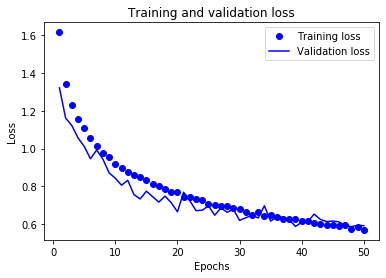

In [92]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Feature extraction

We need to use the representation of the image in order to see if by learning on k classes, we are able to differentiate other classes.

In order to do so, we need to recreate a model based on the previous one but with an output that will be the penultimate layer.

In [93]:
import numpy as np

nb_examples = 700

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-3].output)

results = intermediate_layer_model.predict(x_other)
print(results.shape)
print(y_other.shape)

state = True
i = 0
results_per_class = [0]*(10-num_classes)
while state:
  x = intermediate_layer_model.predict(np.array([x_other[i]]))[0]
  y = y_other[i,0]
  if type(results_per_class[y - num_classes]) == type(0): 
    results_per_class[y - num_classes] = [x]
  else:
    if len(results_per_class[y - num_classes]) < nb_examples:
      results_per_class[y - num_classes].append(x)
    else:
      stop = True
      for elem in results_per_class:
        if type(elem) == type(0): 
          stop = False
          break
        if len(elem) < nb_examples:
          stop = False
          break
      if stop: state = False
  i += 1
results_per_class = np.array(results_per_class)
print(results_per_class.shape)

(24000, 600)
(24000, 1)
(4, 700, 600)


Size of the dataframe: (24000, 602)
Explained variation per   principal component: [0.36746252 0.11228747 0.06817216]
Size of the dataframe: (7000, 605)


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


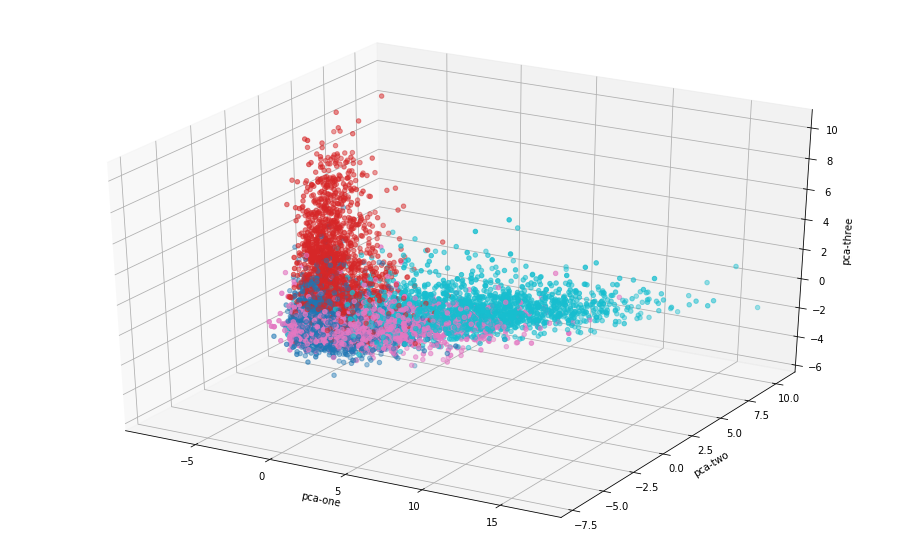

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7000 samples in 0.147s...
[t-SNE] Computed neighbors for 7000 samples in 47.591s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional probabilities for sample 2000 / 7000
[t-SNE] Computed conditional probabilities for sample 3000 / 7000
[t-SNE] Computed conditional probabilities for sample 4000 / 7000
[t-SNE] Computed conditional probabilities for sample 5000 / 7000
[t-SNE] Computed conditional probabilities for sample 6000 / 7000
[t-SNE] Computed conditional probabilities for sample 7000 / 7000
[t-SNE] Mean sigma: 1.638255
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.207619
[t-SNE] KL divergence after 300 iterations: 2.711452
t-SNE done! Time elapsed: 82.19672441482544 seconds


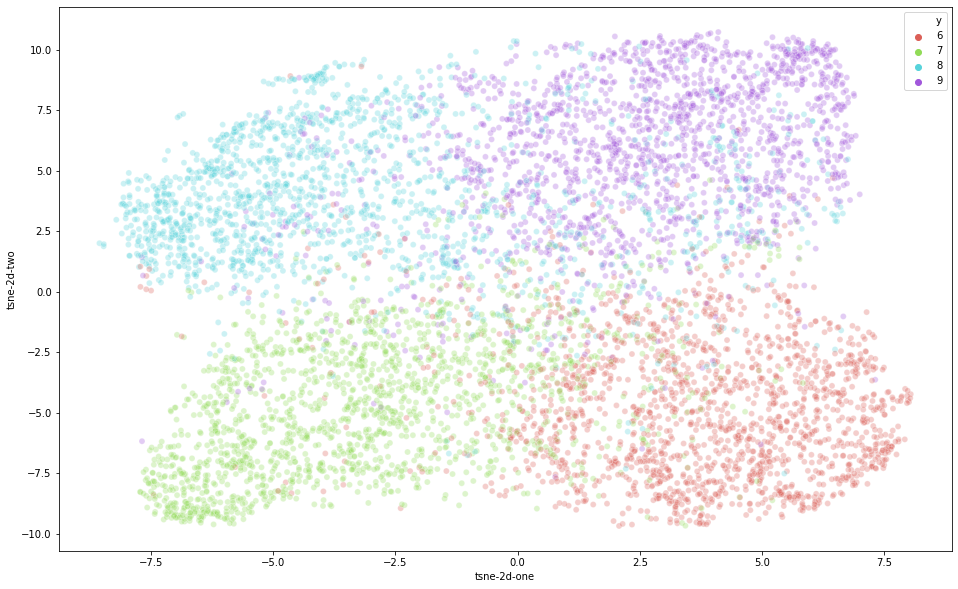

In [94]:
from __future__ import print_function
import time
import pandas as pd
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

N = 7000
feat_cols = [ 'index'+str(i) for i in range(results.shape[1]) ]
df = pd.DataFrame(results,columns=feat_cols)
df['y'] = y_other
df['label'] = df['y'].apply(lambda i: str(i))
print('Size of the dataframe: {}'.format(df.shape))

########### PCA ##########
# np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]

print('Explained variation per \
  principal component: {}'.format(pca.explained_variance_ratio_))
print('Size of the dataframe: {}'.format(df_subset.shape))
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df_subset.loc[rndperm,:]["pca-one"], 
    ys=df_subset.loc[rndperm,:]["pca-two"], 
    zs=df_subset.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:]["y"], cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

######## T-SNE Method ########
data_subset = df_subset[feat_cols].values
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",hue="y",
    palette=sns.color_palette("hls", 10-num_classes),
    data=df_subset, legend="full", alpha=0.3)

# Prediction with one nearest neighbor

We select as reference one example of each class and we will evaluate the precision of an algorithm that attributes an unkown image to the nearest reference.

In [95]:
import random as rd

def compute_nearest_neighbor(vector, data_set):
  """ 
  This function returns the index of the nearest neighbor in the data_set
  while making sure that this neighbor is similar to vector.
  INPUTS:
  - vector: array of coordinates of the same dimension of the vectors in 
  data_set
  - data_set: array of vectors.
  OUTPUT:
  - nn: index of the nearest_neighbor.
  COMPUTATION TIME:
  Immediate
  """
  mini = 1000000
  nn = 0
  for i in range(data_set.shape[0]):
    elem = data_set[i,:]
    dist = np.linalg.norm(vector - elem)
    if dist != 0.:
      if dist < mini:
        nn = i
        mini = dist
  return nn

# # Test compute_nearest_neighbor:

# data_set = [[0,0], [1,4], [1,1]]
# data_set = np.array(data_set)
# vector = np.array([0,0])
# print(compute_nearest_neighbor(vector, data_set))

# Tests:
nb_of_different_references = 100
accuracies = np.zeros((10-num_classes, nb_of_different_references))
for p in range(nb_of_different_references):
  index_ref = rd.randint(0, nb_examples-1)
  references = results_per_class[:,index_ref]
  for i in range(10-num_classes):
    nb_mistakes = 0
    k = 0
    for elem in results_per_class[i,:]:
      if k != index_ref:
        index = compute_nearest_neighbor(elem, references)
        if index != i:
          nb_mistakes += 1
      k += 1
    accuracies[i, p] = 1 - nb_mistakes/(nb_examples-1)  
for num_class in range(10-num_classes):
  print("Class n°", num_class+num_classes,"accuracy:", 
        np.mean(accuracies[num_class,:]))

Class n° 6 accuracy: 0.653733905579399
Class n° 7 accuracy: 0.5412303290414878
Class n° 8 accuracy: 0.5639628040057224
Class n° 9 accuracy: 0.5832474964234621
